# Arbeitsblatt 1: Explorative Analyse und Hauptkomponentenanalyse

## 1. Explorative Analyse des Datensatzes ''Boston Housing''

*Boston Housing* ist ein berühmter Datensatz zur Evaluierung von Regressionsalgorithmen. Er enthält 506 Einträge mit jeweils 13 Variablen. Ziel ist es, den Hauspreis (`tgt`) aus den anderen Variablen vorherzusagen. Der Download dieses Datensatzes in einen Pandas-DataFrame wird folgendermaßen durchgeführt:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)

Wichtig für diese Übung ist eine grundlegende Vertrautheit mit den Python-Paketen Numpy und Pandas. Die Abgabe der Aufgabe erfolgt als fertiges IPython-Notebook mit Kommentaren in Markdown.

Aufgaben:

a) Führen Sie für diesen Datensatz eine explorative Analyse wie in der Vorlesung gezeigt mithilfe eines IPython-Notebooks und den Paketen Pandas und Numpy durch. 

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TGT      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
np.shape(boston)

(506, 14)

In [8]:
boston.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

In [9]:
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

In [10]:
boston.duplicated().any()

False

In [11]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot: xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot: xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot: xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot: xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot: xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot: xlabel='B', ylabel='CRIM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot: xlabel='TGT', ylabel='CRIM'>],
       [<AxesSubplot: xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot: xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot: xlabel='NOX', ylabel='ZN'>,
        <Axe

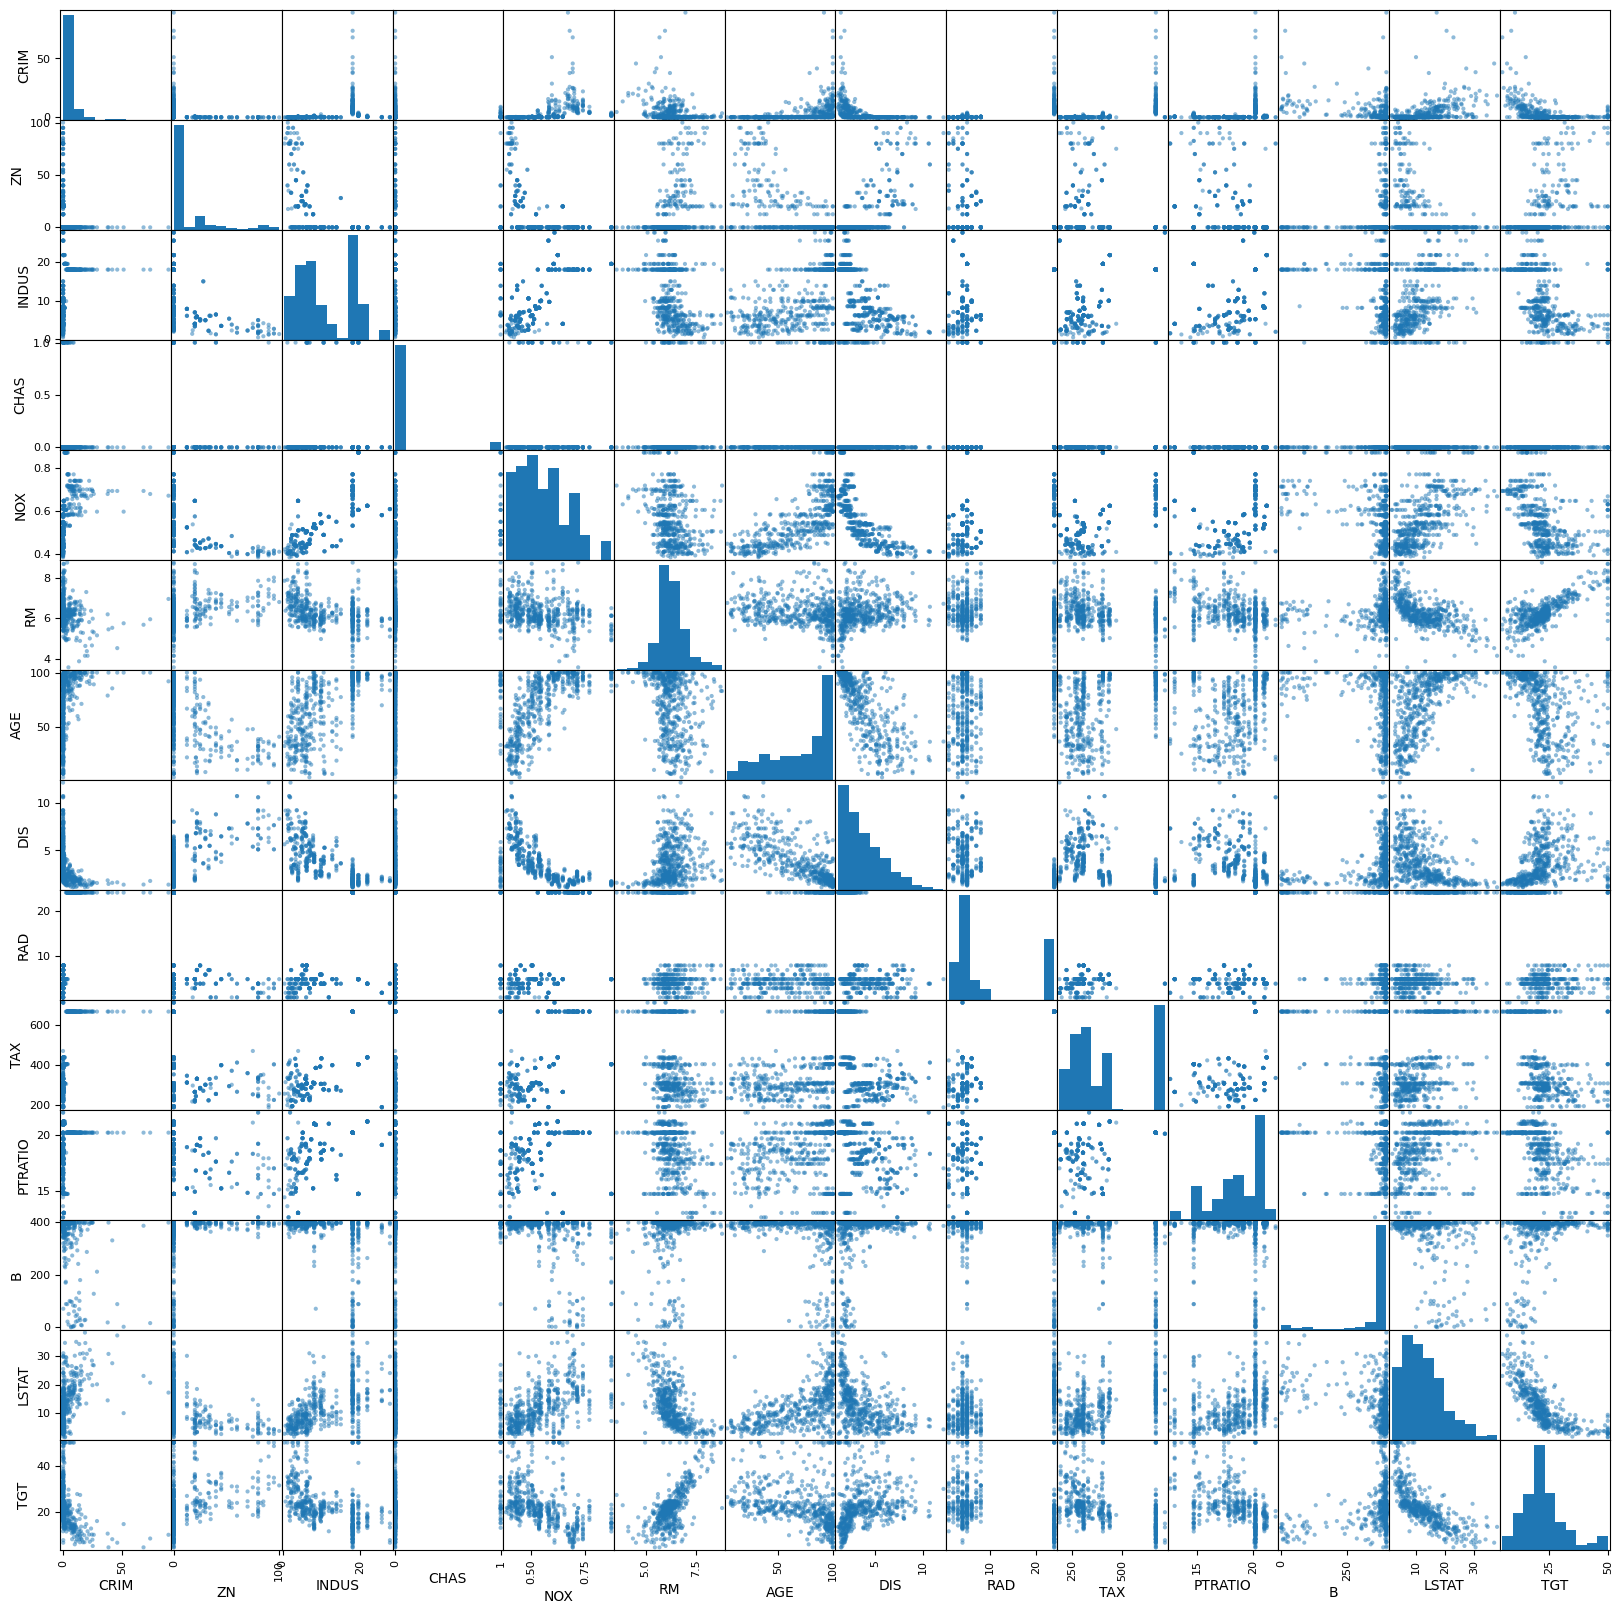

In [12]:
pd.plotting.scatter_matrix(boston, figsize=(20,20))

In [13]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


b) Beantworten Sie anhand der Darstellung der Streumatrix folgende Fragen: Welche der Variablen sind kategorisch? Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? Welche dieser Variablen sind miteinander korreliert? Welche sind daher Kandidaten, die man evtl. weglassen könnte? (Beantwortung bitte als Markup in Notebook eintragen)

### Welche der Variablen sind kategorisch?
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- RAD - index of accessibility to radial highways (???)

### Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum?
- Alle, die eine hohe Korrelation zum Hauspreis (TGT) haben (z.B. r > 0.3 | r < -0.3 : CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, B, LSTAT)  

c) Die Dokumentation der eingesetzten Systemkonfiguration und Paketversionen erfolgt durch das Skript `version_information` von R. H. Johanson. Installation über

In [14]:
pip install version-information

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\Chris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Im Notebook-Header muss das Paket importiert werden über

In [15]:
%load_ext version_information

Danach kann die Information über die Systemkonfiguration dargestellt werden durch

In [16]:
%version_information

Software versions
Python 3.10.8 64bit [MSC v.1933 64 bit (AMD64)]
IPython 8.5.0
OS Windows 10 10.0.22621 SP0
Tue Oct 25 13:16:32 2022 Mitteleuropäische Sommerzeit

Sollen zusätzlich Versionsinformationen über die eingesetzten Pakete dargestellt werden, verwendet man (hier z.B. Numpy und Pandas)

In [17]:
%version_information numpy, pandas

Software versions
Python 3.10.8 64bit [MSC v.1933 64 bit (AMD64)]
IPython 8.5.0
OS Windows 10 10.0.22621 SP0
numpy 1.23.3
pandas 1.5.0
Tue Oct 25 13:16:32 2022 Mitteleuropäische Sommerzeit

Diese Zeilen sollten immer am Ende des Notebooks aufgerufen werden, um ein Mindestmaß an Reproduzierbarkeit sicherzustellen.

## 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database

Diese Aufgabe befasst sich mit einer deutlich umfangreicheren Datenbank des *U.S. Department of Agriculture*, aufbereitet im Format JSON von A. Williams, zum Thema Nährstoffge- halt von Nahrungsmitteln. Sie enthält 6636 Einträge für Nahrungsmittel, alle in Form von JSON-Records, wie z.B.:

```
{
    "id": 21441,
    "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing,
        meat and skin with breading", "tags": ["KFC"],
    "manufacturer": "Kentucky Fried Chicken", "group": "Fast Foods",
    "portions": [ 
        {
            "amount": 1,
            "unit": "wing , with skin",
            "grams": 68.0 
        },
        ...
    ], 
    "nutrients": [
        {
            "value": 20.8,
            "units": "g", 
            "description": "Protein",
            "group": "Composition" 
        },
        ... 
    ]
}
```

Ziel der Analyse in dieser Übung ist es, eine explorative Analyse des Gehalts des Spurenelementes Zink in den verschiedenen Nahrungsmitteln zu durchzuführen. Notwendig dafür sind etwas aufwändigere, aber für die Datenanlyse typische Manipulationen mit Pandas sowie der
Einsatz zusätzlicher Python-Standardbibliotheken zum Download und der Verarbeitung von Zip- und JSON-Dateien.

Aufgaben:


a) Laden Sie die Datenbank als zip-File aus Moodle herunter und lesen Sie dieses File direkt in ein neues Notebook ein. Die bisher verwendete Pandas-Methode `read_csv()` funktioniert für JSON-Files leider nicht. Das heruntergeladene File wird stattdessen mithilfe des Py- thonmoduls `zipfile` entpackt und dem Python-Befehl `open()` eingelesen. Die Umwandlung des JSON-Formates in ein geeignetes Python-Format erfolgt mit einem weiteren Modul der Python-Standardlibrary, `json`, hier mithilfe der Funktion `json.load()`. Lesen Sie dazu die zugehörigen, auf dem Web bzw. Stackoverflow verfügbaren Anleitungen.

In [18]:
import zipfile
import json
archive = zipfile.ZipFile('foods-2011-10-03.json.zip', 'r')
data = json.load(archive.open('foods-2011-10-03.json'))

b) Die Datenbank steht nun in Form einer Liste aus 6636 Python-Dictionaries zu Verfügung. Jedes Dictionary enthält Angaben zu einem Nahrungsmittel. Greifen Sie sich ein beliebiges Nahrungsmittel heraus und lassen sich die Namen der Einträge mit der Methode `dict.keys()` anzeigen. Einer der Einträge enthält die enthaltenen Nährstoffe (`nutrients`), ebenfalls als Dictionary. Lassen Sie sich wiederum einen beliebigen Eintrag der Nährstoffliste anzeigen. Es sollte auffallen, dass manche Feldnamen doppelt vorkommen.

Teile dieser hierarchischen Struktur sollen nun in eine einheitliche Tabelle umgewandelt werden, um eine explorative Analyse durchführen zu können.

Vorgehensweise:

* Kopieren Sie zunächst die Felder `description`,`group`,`id`,`manufacturer` in einen eigenen DataFrame `info`, sowie alle Nährstofflisten in ein Array von DataFrames, wobei Sie an jeden DataFrame die entsprechende ID des Nahrungsmittels als eigene Spalte anhängen.
* Dieses Array wird mithilfe der Funktion `pandas.concat()` zu einem großen DataFrame nutrients (389355 Einträge) vereinigt.
* Entfernen Sie alle Duplikate aus diesem DataFrame.
* Bevor beide DataFrames vereinigt werden können, gibt es noch ein Problem: beide enthalten Felder mit dem Namen `description` und `group` (s.o.). Benennen Sie diese daher mithilfe von DataFrame.rename() in eindeutige Namen um.
* Vereinigen Sie beide DataFrames mit `pandas.merge(nutrients, info, on=’id’, how=’outer’)` anhand der Nahrungsmittel-ID.

Überprüfen Sie das Ergebnis jeder Manipulation mit `DataFrame.head()``.

In [19]:
print(data[0].keys())
print(data[0]['nutrients'][0])
# generate a DataFrame 'info' with fields 'id', 'description', 'manufacturer', 'group'
df = pd.DataFrame(data)
info = df[['id', 'description', 'manufacturer', 'group']]
# generate a DataFrame 'nutrients' with fields 'id', 'description', 'group', 'nutrients'
nutrients = []
for rec in data: 
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)
# remove duplicates
nutrients = nutrients.drop_duplicates()

nutrients.head()

# rename columns
col_mapping = {'description': 'food', 'group': 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)

# merge info and nutrients
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.head()
 





dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])
{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


,value,units,description,group,id,food,manufacturer,fgroup
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",,Dairy and Egg Products
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",,Dairy and Egg Products
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",,Dairy and Egg Products
3,3.28,g,Ash,Other,1008,"Cheese, caraway",,Dairy and Egg Products
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",,Dairy and Egg Products


c) Nun sind die Daten bereit für die Untersuchung auf das Spurenelement Zink (Feldname: `Zinc, Zn`). Lesen Sie dazu alle Tabelleneinträge mithilfe einer geeigneten Indizierung in einen DataFrame aus, der nur Einträge zum Nährstoff Zink enthält. Daraus wählen Sie wiederum die Spalte mit dem Zinkgehalt in mg (`value`) aus und stellen dafür ein Histogramm und eine Liste deskriptiver Statistiken dar. 


<AxesSubplot: ylabel='fgroup'>

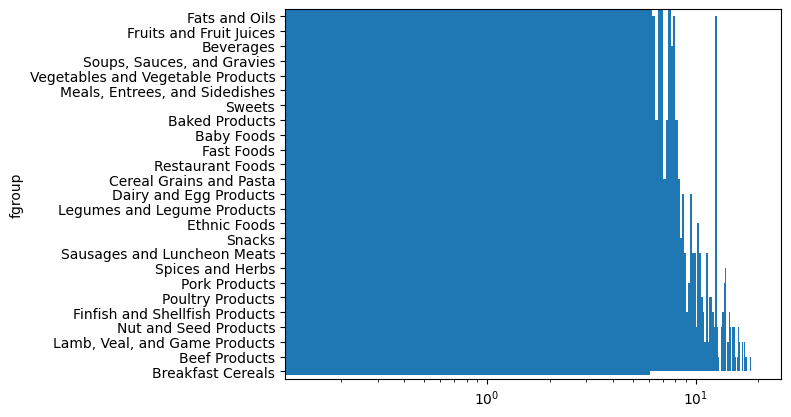

In [20]:
# remove all nutients exept zinc 
zincData = ndata[ndata['description'] == 'Zinc, Zn']

# histogram of zinc content  (hist range 0-20)
zincData['value'].hist(bins=100 ,range=(0,20)) 

#show the mean zinc content across all food groups
zincData.groupby('fgroup')['value'].mean().sort_values(ascending=False).plot(kind='barh', logx=True)

Finden Sie in Ihrer Tabelle Edamer (`Cheese, edam`). Hat Edamer einen überdurchschnittlichen Zinkgehalt?

In [21]:
zincData.describe()

,value,id
count,6137.000000,6137.000000
mean,2.228589,15555.259573
std,3.975321,8645.544374
min,0.000000,1008.000000
25%,0.340000,10185.000000
50%,0.980000,14269.000000
75%,2.980000,19108.000000
max,90.950000,93600.000000



 Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt? 

In [22]:
# mean zinc content of food: `Cheese, edam`
zincData[zincData['food'] == 'Cheese, edam']['value'].mean()
 

3.75

Ja das 75% Quantil hat einen Wert von 2.98mg im gegensatz zu Edamer mit 3.75mg.

Welches Nahrungsmittel hat den maximalen Zinkgehalt?

,value,units,description,group,id,food,manufacturer,fgroup
333726,90.95,mg,"Zinc, Zn",Elements,15170,"Mollusks, oyster, eastern, canned",,Finfish and Shellfish Products


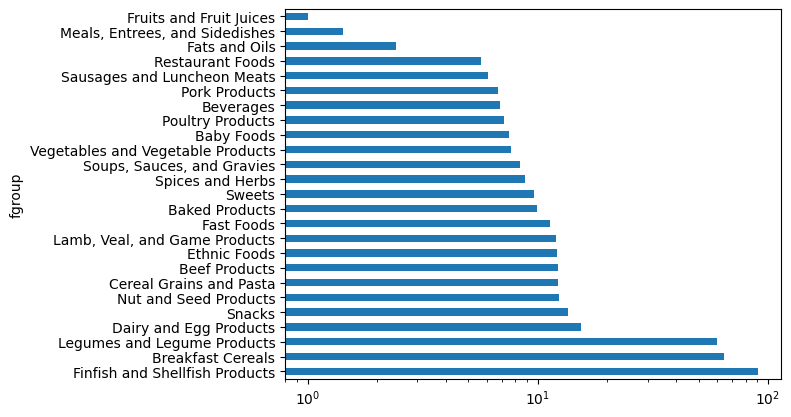

In [37]:
#plot zinc content sorted by food group

zincData.groupby('fgroup')['value'].max().sort_values(ascending=False).plot(kind='barh', logx=True)

# print the data with the highest zinc content
zincData[zincData['value'] == zincData['value'].max()]


## 3. Implementierung der Hauptkomponentenanalyse

Wir beginnen zunächst mit einem schon bekannten Datensatz *Boston Housing*. Zur praktischen Berechnung der Hauptkomponentenanalyse gehen Sie folgt vor:

1. Gegeben eine Menge von $n$ $d$-dimensionalen Datenpunkten $\mathbf{x}_i$, berechnen Sie zuerst deren Mittelwert $\boldsymbol{\mu}_x = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i$ für jedes einzelne Merkmal und ziehen ihn von allen Datenpunkten ab (Zentrierung).
2. Normieren Sie dann alle Merkmale so, dass sie eine Varianz von 1 haben. Dieser Schritt ist optional, aber meist vorteilhaft.
3. Kopieren Sie alle $\mathbf{x}_i$ als Reihen in eine $n \times d$-Matrix $X$, die sog. Daten- oder Designmatrix.
4. Zur Lösung des Eigenwertproblens berechnen Sie die Singulärwertzerlegung von $X$ (z.B. mit `numpy.linalg.svd()`): $$ X = UDV^\top $$
Wer nicht weiß, was eine Singuärwertzerlegung ist oder macht, der lese bitte in den entsprechenden Wikipedia-Einträgen nach. Im Prinzip könnte man auch direkt die Eigenwerte der Kovarianzmatrix (s. Folie 12) berechnen (z.B. mit `numpy.linalg.eig()`), diese Methode ist aber meist aufwändiger und numerisch weniger stabil.
5. Die ersten $r$ Basisvektoren $\mathbf{q}_i$  (d.h die ersten $r$ Hauptkomponenten) sind die ersten $r$ Spalten der orthogonalen $d \times d$-Matrix $V$.
6. Die Projektionen $a_i$ der Daten $\mathbf{x}_i$ auf die ersten $r$ Basisvektoren $\mathbf{q}_i$ (d.h die neuen Variablenwerte im neuen Koordinatensystem) sind die die ersten $r$ Spalten der $n \times d$-Matrix $UD$.
7. Die Standardabweichungen entlang der Hauptkomponenten $\mathbf{q}_i$ sind die Diagonalelemente der Diagonalmatrix $D$ geteilt durch $\sqrt{n - 1}$.

Aufgaben:

a) Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse nach obigem Schema zur Verfügung stellt.

b) Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz *Boston Housing*. Lassen Sie dabei die Variable `TGT` weg. Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix (Achtung: die Diagonalelemente von $D$ müssen dafür quadriert und durch n − 1 geteilt werden. Warum?), dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz (“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil die ersten $n$ Komponenten zusammen erklären. Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

c) Berechnen Sie die Matrix der Korrelationskoeffizienten für die transformierten Variablen und interpretieren Sie das Ergebnis.

d) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.

e. Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb. Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?